In [45]:
pip install huggingface_hub


Note: you may need to restart the kernel to use updated packages.


In [51]:
# Install datasets library if not already installed
# !pip install datasets --upgrade

from datasets import load_dataset

# Load the dataset from Hugging Face
dataset = load_dataset("abhinavsarkar/delhi_air_quality_feature_store_processed.csv")

# Check the splits
print(dataset)

# Convert the 'train' split to a pandas DataFrame (optional)
df = dataset["train"].to_pandas()

# Check the first few rows
print(df.head())

# Save as CSV locally (optional)
df.to_csv("delhi_air_quality_processed.csv", index=False)


README.md: 0.00B [00:00, ?B/s]

C:\Users\rupesh\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\rupesh\.cache\huggingface\hub\datasets--abhinavsarkar--delhi_air_quality_feature_store_processed.csv. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


delhi_air_quality_feature_store_processe(…):   0%|          | 0.00/443M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2921413 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['location_id', 'city', 'event_timestamp', 'temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction', 'pm25', 'pm10', 'no2', 'so2', 'o3', 'co', 'aqi'],
        num_rows: 2921413
    })
})
                                         location_id          city  \
0  Delhi Institute of Tool Engineering, Wazirpur,...      Wazirpur   
1             Satyawati College, Delhi, Delhi, India         Delhi   
2  ITI Shahdra, Jhilmil Industrial Area, Delhi, D...       Jhilmil   
3  Sonia Vihar Water Treatment Plant DJB, Delhi, ...   Sonia Vihar   
4   PGDAV College, Sriniwaspuri, Delhi, Delhi, India  Sriniwaspuri   

              event_timestamp  temperature  humidity  pressure  wind_speed  \
0  2000-03-15 13:44:28.651396       30.450    74.100   990.425       0.300   
1  2000-03-15 13:44:28.651396       26.675    74.350   980.650       1.375   
2  2000-03-15 13:44:28.651396       28.775    62.925   984.350       0.300   
3  2000-03-15 

In [65]:
import pandas as pd
from datasets import load_dataset
df=dataset["train"].to_pandas()
df['event_timestamp']=pd.to_datetime(df['event_timestamp'])
df['year']=df['event_timestamp'].dt.year
df['month'] = df['event_timestamp'].dt.month
df['day'] = df['event_timestamp'].dt.day
df['hour'] = df['event_timestamp'].dt.hour

# Example: Check the first 5 rows
print(df.head())

                                         location_id          city  \
0  Delhi Institute of Tool Engineering, Wazirpur,...      Wazirpur   
1             Satyawati College, Delhi, Delhi, India         Delhi   
2  ITI Shahdra, Jhilmil Industrial Area, Delhi, D...       Jhilmil   
3  Sonia Vihar Water Treatment Plant DJB, Delhi, ...   Sonia Vihar   
4   PGDAV College, Sriniwaspuri, Delhi, Delhi, India  Sriniwaspuri   

             event_timestamp  temperature  humidity  pressure  wind_speed  \
0 2000-03-15 13:44:28.651396       30.450    74.100   990.425       0.300   
1 2000-03-15 13:44:28.651396       26.675    74.350   980.650       1.375   
2 2000-03-15 13:44:28.651396       28.775    62.925   984.350       0.300   
3 2000-03-15 13:44:28.651396       26.575    78.525   991.300       0.300   
4 2000-03-15 13:44:28.651396       22.300    71.425   985.650       0.300   

   wind_direction   pm25   pm10   no2   so2    o3    co    aqi  year  month  \
0            21.7  252.0  332.0  62.4

In [67]:
df_delhi=df[df['city'].str.lower()=='delhi'].copy()

In [73]:
#daily aqi trend
daily_aqi=df_delhi.groupby(['year','month','day'])['aqi'].mean().reset_index()
print(daily_aqi.head())

   year  month  day    aqi
0  2000      3   15  256.0
1  2000      3   16  256.0
2  2000      3   17  256.0
3  2000      3   18  256.0
4  2000      3   19  256.0


In [75]:
#monthly average aqi
monthly_aqi=df_delhi.groupby(['year','month'])['aqi'].mean().reset_index()
print(monthly_aqi)

     year  month    aqi
0    2000      3  256.0
1    2000      4  256.0
2    2000      5  256.0
3    2000      6  256.0
4    2000      7  256.0
..    ...    ...    ...
214  2018      1  209.0
215  2018      2  209.0
216  2018      3  209.0
217  2018      4  209.0
218  2018      5  209.0

[219 rows x 3 columns]


In [77]:
hourly_aqi=df_delhi.groupby('hour')['aqi'].mean()
print(hourly_aqi)

hour
0     297.040563
1     297.040563
2     297.040563
3     297.053277
4     297.053277
5     297.035271
6     297.029064
7     297.050401
8     297.030578
9     297.031184
10    297.030730
11    297.008781
12    297.030730
13    297.024519
14    297.013925
15    297.057800
16    297.057800
17    297.057800
18    297.071126
19    297.048433
20    297.024069
21    297.038898
22    297.038898
23    297.038898
Name: aqi, dtype: float64


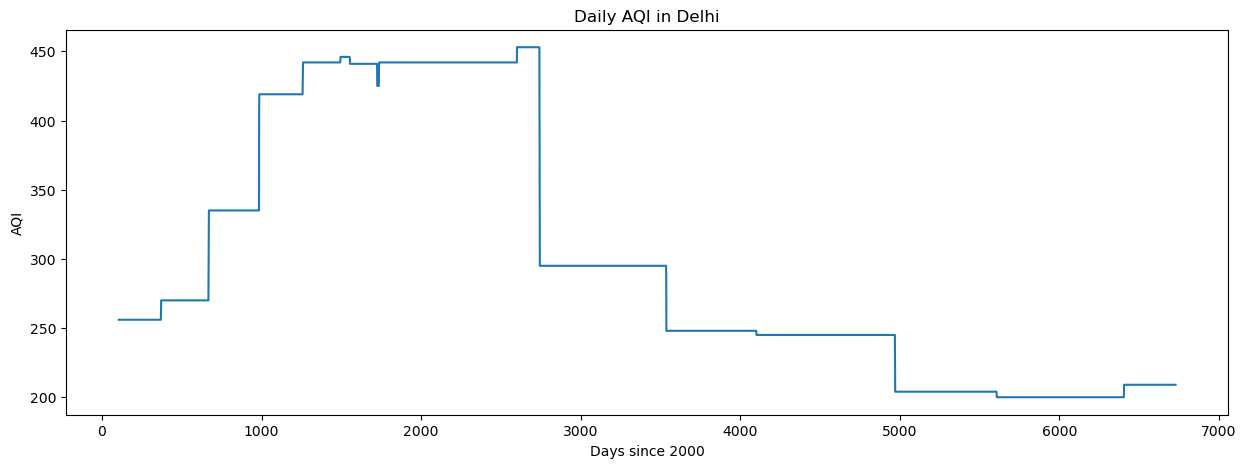

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(daily_aqi['day'] + daily_aqi['month']*30 + (daily_aqi['year']-2000)*365, daily_aqi['aqi'])
plt.xlabel('Days since 2000')
plt.ylabel('AQI')
plt.title('Daily AQI in Delhi')
plt.show()


C:\Users\rupesh\AppData\Local\Temp\ipykernel_19168\2721830035.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_aqi.index, y=hourly_aqi.values, palette='Reds')


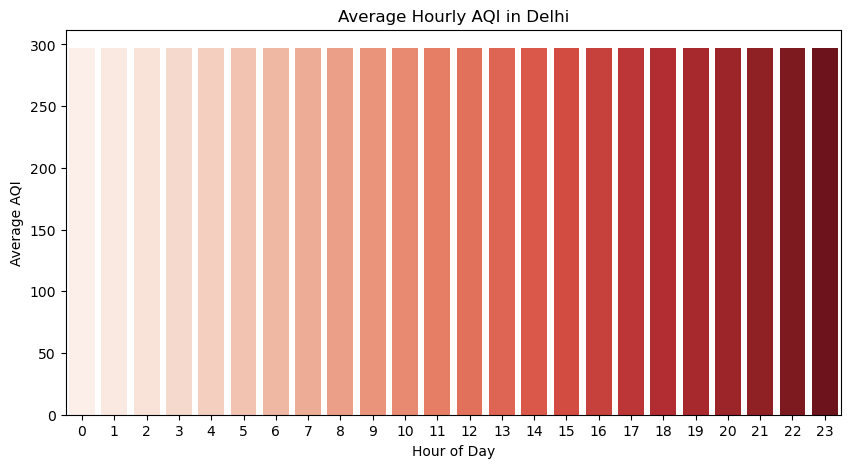

In [81]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x=hourly_aqi.index, y=hourly_aqi.values, palette='Reds')
plt.xlabel('Hour of Day')
plt.ylabel('Average AQI')
plt.title('Average Hourly AQI in Delhi')
plt.show()


In [102]:
df_delhi.isnull().sum()

location_id        0
city               0
event_timestamp    0
temperature        0
humidity           0
pressure           0
wind_speed         0
wind_direction     0
pm25               0
pm10               0
no2                0
so2                0
o3                 0
co                 0
aqi                0
year               0
month              0
day                0
hour               0
odd_even_active    0
dtype: int64

In [106]:
from sklearn.model_selection import train_test_split
features=['temperature','humidity','pressure','wind_speed','wind_direction',
            'pm25','pm10','no2','so2','o3','co',
            'year','month','hour','odd_even_active']
target = 'aqi'

X = df_delhi[features]
y = df_delhi[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.0
R2 Score: 1.0


In [110]:
# Make a copy of test set
X_test_policy = X_test.copy()

# Simulate policy ON
X_test_policy['odd_even_active'] = 1
y_pred_policy = model.predict(X_test_policy)

# Current predicted AQI (without policy)
y_pred_current = model.predict(X_test)

# Compute % reduction
reduction_percent = ((y_pred_current - y_pred_policy) / y_pred_current * 100).mean()
print(f"Predicted average AQI reduction if policy applied: {reduction_percent:.2f}%")


Predicted average AQI reduction if policy applied: 0.00%
